In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
#override matplot styles to use seaboran
sns.set()


    Clean
    RElax
    
 ### Loading the raw data
    

In [4]:
#Remember: Categorical data is not numeric
raw_data = pd.read_csv('data/1.04. Real-life example.csv')

In [5]:
raw_data.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Preprocessing

#### Exploring the descriptiived statistics of the variables

In [6]:
#display descriptive for the categorical variables too
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


1. First thing we notice is that each variable has a different number of observations, which implies there are some missing values.

2. We can see  unique entries for categorical variables

3. There are three hundred and twelve unique models. That's something really hard to implement at a regression that would mean more than 300 dummies.

4. Another piece of information we obtain is the most common category below is its frequency registration,for instance, as 3947. Yes, entries, almost all of them.Looks like this variable won't be very useful.As we mentioned, reliably implementing model into a regression would be a very hard task, so we'll drop the variable.

5. A lot of the information from model could be engineered from brand, year and engine volume.

running a regression with model two to remove the variable will use the panda's method drop.  It has two arguments.The columns I want to drop and the axis.

### Determining the variables of interest

In [7]:
#There are three hundred and twelve unique models. That's something really hard to 
#implement at a regression that would mean more than 300 dummies.
#axis1 = columns
#axis0 = rows.  
# Want to drop the column:model
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
#delete the observation is less than 5%
data_no_mv = data.dropna(axis=0)  

No missing values

In [10]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

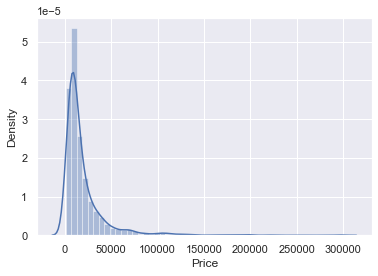

In [11]:
sns.distplot(data['Price'])

For the optimal results, we would be looking for a normal distribution price, however, has an exponential one because is has an increasing and decreasing slope. This will surely be a problem for our regression.

Outliers are observations that lie on abnormal distance from other observations in the data, they will

affect the regression dramatically in cost coefficients to be inflated as the regression will try to

place the line closer to those values.

One way to deal with that seamlessly is to remove the top one percent of observations.

The simplest way to do that with code is through the quantized method, it takes one argument the quintile.

### Dealing with outliers

In [12]:
#I want to get the 99 percentile and keep the data below the ninety ninth percentile.
#This is one way to eliminate outliers.
#OK, what's a smart way to do that, we can declare a new variable called Q. It is equal 
#to data, no M.V. Price series dot quintile, zero point nine nine in brackets.
q = data_no_mv['Price'].quantile(0.99)
cond = data_no_mv['Price']<q
#create a dataframe that only includes the price of the 99th percentile
data_1 = data_no_mv[cond]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Notice, the Price max has been reduced from 300000 to 129222.  THe 99th percentile is 129222

The maximum value was around one hundred and thirty thousand dollars or the ninety ninth percentile.

While still far away from the mean, it is acceptably closer.

Note that in general, we don't print descriptives in data frames all the time, you do it once and

just manipulate your data with code until you were done.

Every now and then, you can check what's going on, but you'll rarely do that later when you become

more experienced.

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

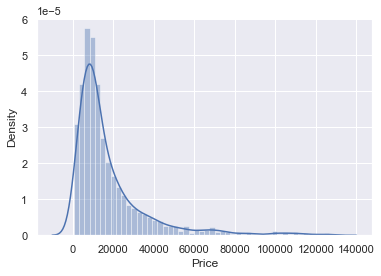

In [13]:
sns.distplot(data_1['Price'])

Notice the data is distributed the same way but with less outliers


This issue is out of the way, however, we have a similar issue with mileage engine volume and yea,

we can see that the situation with mileage is almost identical from its PDF.

Therefore, we can deal with it in the same way by keeping only the data lower than the ninety ninth

percentile.

Here's the improved result.

OK, easy.

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

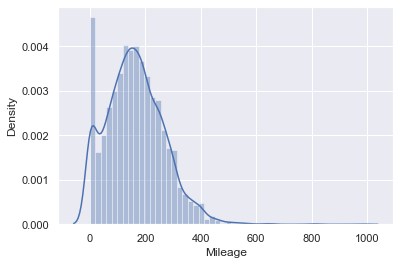

In [14]:
sns.distplot(data_no_mv['Mileage'])

This issue is out of the way, however, we have a similar issue with mileage engine volume and yea,we can see that the situation with mileage is almost identical from its PDF.

Therefore, we can deal with it in the same way by keeping only the data lower than the ninety ninth percentile.



In [15]:
#Lets only keep the data lower than the 90th percentile
q = data_1['Mileage'].quantile(0.99)
cond = data_1['Mileage']<q
#create a dataframe that only includes the price of the 99th percentile
data_2 = data_1[cond]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Mileage max has reduced from 980.000000 to 435.000000	

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

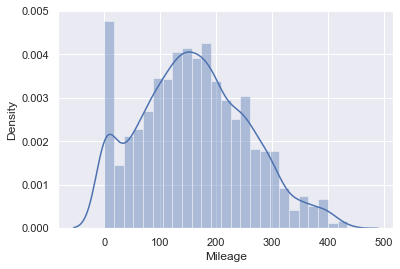

In [16]:
sns.distplot(data_2['Mileage'])

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

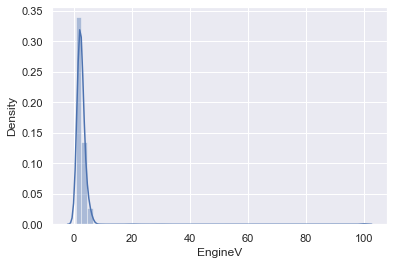

In [17]:
#Let first look at the engine volumn pdf
sns.distplot(data_no_mv['EngineV'])

In [18]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')
 

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


What about engine volume, here is its PDF. It is rather strange if we were to examine engine volume manually. 

We will notice that there are also the engine volume values of 99.99 etc..

Now, I'm no car expert, but these are not usual values.

Moreover, looking at the descriptives, it seems that most values are really low.

A quick search on Google would confirm that the interval where engine volume should fall is between 0.6 and 6.5

Therefore, those ninety nine point nine nines, 90s and so on are incorrect entries. Actually, a common way to label missing values is by assigning 99.99.  
Actually, its a common way to label missing values by assigning ninety nine point nine nine.However, be aware that some people still do it.

In [19]:
#However, be aware that some people still do it. Here we have a benchmark 
#six point five, this time I'll remove all values that are lower than
#six point
cond = data_2['EngineV']<6.5
data_3 = data_2[cond]


C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

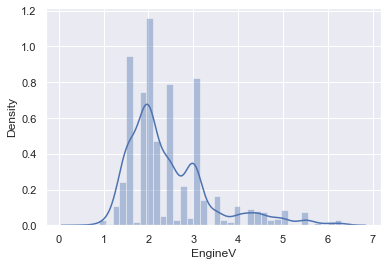

In [20]:
sns.distplot(data_3['EngineV'])

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

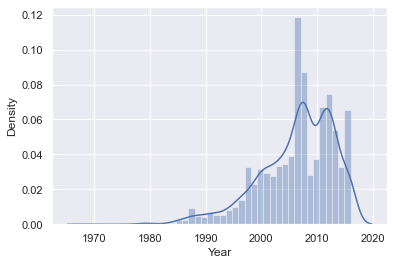

In [21]:
sns.distplot(data_no_mv['Year'])

There are a few vintage cars.  
THis time, lets take the first percentile, and keep all observations that are higher


In [22]:
#This time, lets take the first percentile, and keep all 
#observations that are higher
q = data_3['Year'].quantile(.01)
cond = data_3['Year'] > q
data_4 = data_3[cond]

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

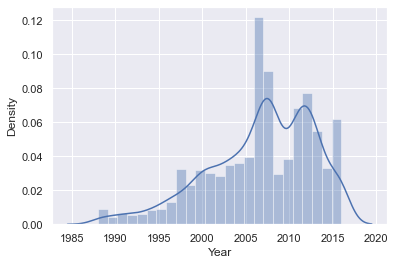

In [23]:
sns.distplot(data_4['Year'])

Currently, the indices of the data frame refer to all the data, but we want them to describe only the data useful for analysis.

The method we will use for resetting the index is data frame, dot, reset index, we will include an argument drop equals true to completely forget the old index.

Finally, I'll print the descriptive statistics once more now all the minimums and maximums seem about right.

Overall, we've deleted around two hundred and fifty observations, but they were the problematic ones,

In [24]:
data_4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [25]:
#Let now create a data varible and reset the index
#now we have successfully cleaned the data
#Currently, the indices of the data frame refer to all the data, but we want them to describe only
#the data useful for analysis.
#The method we will use for resetting the index is data frame, dot, reset index, we will include an
#argument drop equals true to completely forget the old index.
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [26]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Now, minimumns and maximums seem about right

Overall, we've deleted around two hundred and fifty observations, but they were the problematic ones, I promise you that.

### Checking the OLS assumptions

we will explore and relax some of the assumptions we've already identified some variables as potential progressors.

The categorical ones will be included as dummies. 
So we dont have to worry about them when checking the assumptions.

The continuous variables price, year, engine volumne, and mileage are those that are likely to be more challenging, cause us more problems

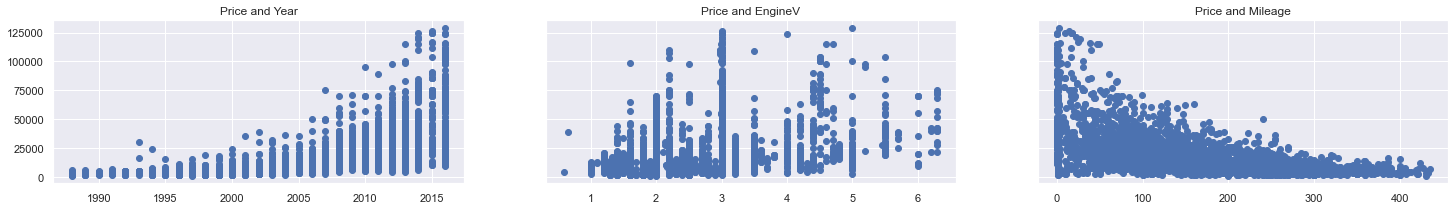

In [29]:
#check for linearity using a scatter plot
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(25,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [36]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data/image1.PNG")

I can spot patterns but no linear ones. In this case, I will not run a linear regression.
I should first firt transform 1 or more variables

Recall the distribution plot of price to all these plots are pointing us towards the idea that price is not normally distributed and from there it's relationships with the other rather normally distributed features is not linear. The patterns are quite exponential.

Log transformation is a common way to deal with exponential data
As I have told you before long, transformation is a common way to deal with this issue.

It is especially useful when facing exponential scatter plots like we do now.

Let's take the log of price and create the plots again.

No, he has a method which calculates the natural log, it is ENPI, dot, log and in brackets what

we want to find the log of, let's declare a variable called log price equal to ENPI dot log of data

price.

#### Relaxing the assumptions

In [40]:
#numpy has a method that calculates the log
#returns the natural logarithm of a number or array of numbers
log_price = np.log(data_cleaned['Price'])

#add it as a new column on the dataframe
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


#### No Endogeneity

there are tests to check if it is violated or one can take the residuals and find their correlation with each independent X.
I can tell you that the assumption is not violated.So it is of no interest.
Moreover, we will have the opportunity to discuss them after the regression is created.

#### 3rd Assumption : Normality and Homoscedasticity
The third assumption had several parts:
   ##### normality: 
       is assumed for a big sample following the central limit theorem, 
   ##### the zero mean of the distribution of errors : 
       is accomplished through the inclusion of the intercept in the regression which we discussed already.

   ##### homoscedasticity: (homo scholasticism assumption )
       generally holds, as we can see in the graphs.

In [43]:
#  
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data/image3.PNG")

#### 4th Assumption:No Autocorrelation
    observations we have are not coming from Time series data or panel data.
    Are the observations dependent on one another?  No

### Multicollinearity

It is logical that year and displ are going to be correlated, right, the newer and bigger the engine, the lower the hwy mpg  .  Therefore, we have grounds to expect some degree of multicam linearity in the data.


One of the best ways to check for MultiKulti in the air is through VIFF or variants inflation factor.
VIFF produces a measure which estimates how much larger the square root of the standard error of an
estimate is compared to a situation where the variable was completely uncorrelated with the other predictors.

In order to save time, I will simply copy paste the relevant code and quickly go through it.
First, we import the VIFF method from stat's models.
Next, we define the features.
We want to check for multiple linearity.
Currently we have only three continuous variables mileage, engine volume and year.
What's left are categorical variables that we haven't dealt with yet.

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'EngineV'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'log_price'}>, <AxesSubplot:>]],
      dtype=object)

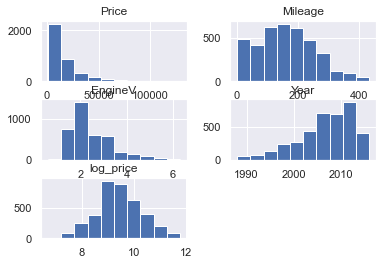

In [48]:
data_cleaned.hist()

In [49]:
#Evaluate the inner correlation of these 3 columns

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [50]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


if VIF = 1, there is no multicollinearity, 1 is also the minmum value of the measure.  Values between 1 and 5 are considered ok. Some source say a VIF above 5 is unacceptable. Some say 5 or even 10.  Here Year is too correlated with the other variables

In [51]:
data_no_multicollineartiy = data_cleaned.drop(['Year'],axis=1)

### Create dummy variables
    

We have already discussed how categorical data is added to a regression through dummy variables. However, if you need to add many dummies simultaneously, there should be some shortcut, right?

Well, PANDAS is equipped with a very useful method called get dummies, get dummy spots.  All categorical variables and creates dummy is automatically an extremely important note is that if we have any categories for a feature, we have to create and minus one dummies.

In [53]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


In [54]:
data_with_dummies = pd.get_dummies(data_no_multicollineartiy, drop_first=True)
data_with_dummies

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


#### Rearrange a bit

In [55]:
data_with_dummies.columns.values


array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [56]:
cols = ['log_price','Price', 'Mileage', 'EngineV',   'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [57]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

#### Declare the inputs and the targets

In [62]:
#declare the input and target variables
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [64]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=.2,random_state=365)

In [70]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [72]:
# to check the final result is to plot the predicted values 
#of our regression against the observed values.
#The observed values are the targets we can obtain.
y_hat = reg.predict(X_train)

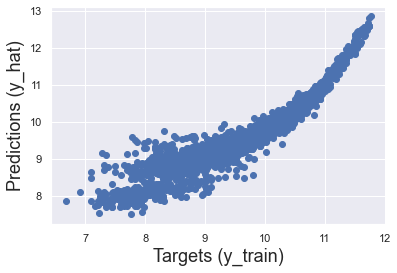

In [77]:
#create a scatter plot of the targets and the predictions
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18) 
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

We can clearly see that the points are situated around the forty five degree line.

So our model has passed this first check.

So far, so good.

C:\Users\FARAH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

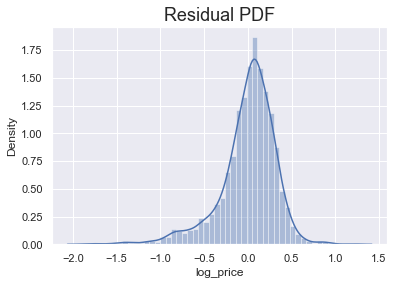

In [82]:
#another test is the residual plot
#residuals = Difference between the targets and the predictions
#This plot refers to the distribution of the residuals.
#plots the difference between y_train and y_hat

sns.distplot(y_train - y_hat)
plt.title('Residual PDF',size=18)

Here it is from the regression assumptions, we know that the errors must be normally distributed with

a mean of zero.

The residuals are the estimates of the errors.

So we would expect the same from them.

The result looks quite normal in the sense of normally distributed.

The means seems to be zero to the only possible issue could be that there is a much longer tail on the

negative side.

Therefore, there are certain observations for which y train minus Y hat is much lower than the mean.

This implies that those predictions tend to overestimate the targets from the fact that there are no

such observations on the right side.

We conclude that the predictions rarely underestimate the targets.

In [83]:
reg.score(X_train, y_train)

0.8613387128149418

Therefore, our model is explaining 86% of the variability of the data. It could be better

#### Finding weights and bias

In [86]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
 
reg_summary 

,Features,weights
0,Price,0.470161
1,Mileage,-0.206132
2,EngineV,0.101350
3,Brand_BMW,0.002997
4,Brand_Mercedes-Benz,-0.010182
5,Brand_Mitsubishi,-0.065440
6,Brand_Renault,-0.098658
7,Brand_Toyota,-0.011951
8,Brand_Volkswagen,-0.035683
9,Body_hatch,-0.079323


If another brand is positive, it means that all else equal the respective brand is more expensive than

Audi, for instance.

BMW is coefficient is positive.

So on average, if a car is a BMW, it will be more expensive than an Audi.

Similarly, if a car is Mitsubishi, it will be cheaper than an Audi.

You will notice that the Mercedes weight is positive, but very close to zero.

Since the dummies are scaled, we cannot be completely sure if a Mercedes is more expensive, but it

##### OK, we can think about the other dummies in a similar way. We display the possible categories and identify which one is the benchmark.

Finally, the size of the weight is also important.

We said that standardised weights are comparable and that's why we standardize them. Clearly, mileage is the most prominent feature in this regression.

It is more than twice as important as engine volume.It is also worth noting that it doesn't make sense to compare the continuous variables with the dummies,dummies are compared with the benchmark dummy for the respective discrete variable, like we compare the brands with Audi.

OK, with this in mind, let's proceed to our final part of the example testing.